# PRÉDICTION DES PRIX DE L'IMMOBILIER : ZILLOW PREDICTION

In [67]:
# importation des utilitaires
import pandas as pd


### Nettoyage de la DataSet

In [68]:
data = pd.read_excel('DataSet_zillow_prediction.xlsx')

In [69]:
data

,longitude,imgSrc,livingAreaValue,streetAddress,county,yearBuilt,latitude,city,currency,timeOnZillow,livingArea,zipcode,propertyTaxRate,bathrooms,bedrooms,price,country,homeType,message
0,-149.90807,https://photos.zillowstatic.com/fp/ce047439c86...,2668.0,500 North St,Anchorage Borough,1959.0,61.217308,Anchorage,USD,3609 days,2668.0,99501,1.31,2.0,3.0,676100,USA,SINGLE_FAMILY,NaN
1,-149.90822,https://maps.googleapis.com/maps/api/streetvie...,3179.0,520 N St,Anchorage Borough,1961.0,61.217136,Anchorage,USD,NaN,3179.0,99501,1.31,2.0,3.0,698600,USA,SINGLE_FAMILY,NaN
2,-149.90833,https://maps.googleapis.com/maps/api/streetvie...,3059.0,522 N St,Anchorage Borough,1983.0,61.217000,Anchorage,USD,3758 days,3059.0,99501,1.31,3.0,4.0,996800,USA,SINGLE_FAMILY,NaN
3,-149.90834,https://photos.zillowstatic.com/fp/10602cde74a...,1642.0,530 North St,Anchorage Borough,1947.0,61.216720,Anchorage,USD,3543 days,1642.0,99501,1.31,2.0,5.0,695300,USA,SINGLE_FAMILY,NaN
4,-149.90749,https://maps.googleapis.com/maps/api/staticmap...,4483.0,545 N St,Anchorage Borough,2000.0,61.217120,Anchorage,USD,3953 days,4483.0,99501,1.31,4.0,4.0,976100,USA,CONDO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,-149.78406,https://photos.zillowstatic.com/fp/9a5eeb7e3bd...,4263.0,11700 Shetland Heights Cir,Anchorage Borough,1978.0,61.115010,Anchorage,USD,1838 days,4263.0,99516,1.31,2.5,3.0,658100,USA,SINGLE_FAMILY,NaN
5153,-149.78296,https://maps.googleapis.com/maps/api/streetvie...,2200.0,5300 Whispering Spruce Dr,Anchorage Borough,1974.0,61.115078,Anchorage,USD,3925 days,2200.0,99516,1.31,2.0,4.0,514200,USA,SINGLE_FAMILY,NaN
5154,-149.75220,https://maps.googleapis.com/maps/api/streetvie...,4180.0,10630 E Tree Dr,Anchorage Borough,1972.0,61.124302,Anchorage,USD,3260 days,4180.0,99507,1.31,4.5,5.0,659000,USA,SINGLE_FAMILY,NaN
5155,-149.75658,https://maps.googleapis.com/maps/api/streetvie...,3928.0,6747 Double Tree Ct,Anchorage Borough,1972.0,61.124546,Anchorage,USD,3728 days,3928.0,99507,1.31,3.0,5.0,709400,USA,SINGLE_FAMILY,NaN


In [70]:
data.columns

Index(['longitude', 'imgSrc', 'livingAreaValue', 'streetAddress', 'county',
       'yearBuilt', 'latitude', 'city', 'currency', 'timeOnZillow',
       'livingArea', 'zipcode', 'propertyTaxRate', 'bathrooms', 'bedrooms',
       'price', 'country', 'homeType', 'message'],
      dtype='object')

In [71]:
data['currency'].unique()

array(['USD'], dtype=object)

In [72]:
data['country'].unique()

array(['USA'], dtype=object)

### Supression des colonnes
On commence par supprimer les colonnes qui ne vont pas nous aider pour la prédiction.
On devra supprimer les colonnes qui ont la même valeur dans la plus part des lignes de la DataSet. Et pour savoir quel sont ces colonne, on à utilisé la méthode **unique** pour afficher les champs unique d'une colonne

In [73]:
col = ['imgSrc', 'currency', 'country', 'message', 'timeOnZillow', 'livingAreaValue']
for elem in col:
    data.drop(columns=[elem], inplace=True)

In [74]:
data

,longitude,streetAddress,county,yearBuilt,latitude,city,livingArea,zipcode,propertyTaxRate,bathrooms,bedrooms,price,homeType
0,-149.90807,500 North St,Anchorage Borough,1959.0,61.217308,Anchorage,2668.0,99501,1.31,2.0,3.0,676100,SINGLE_FAMILY
1,-149.90822,520 N St,Anchorage Borough,1961.0,61.217136,Anchorage,3179.0,99501,1.31,2.0,3.0,698600,SINGLE_FAMILY
2,-149.90833,522 N St,Anchorage Borough,1983.0,61.217000,Anchorage,3059.0,99501,1.31,3.0,4.0,996800,SINGLE_FAMILY
3,-149.90834,530 North St,Anchorage Borough,1947.0,61.216720,Anchorage,1642.0,99501,1.31,2.0,5.0,695300,SINGLE_FAMILY
4,-149.90749,545 N St,Anchorage Borough,2000.0,61.217120,Anchorage,4483.0,99501,1.31,4.0,4.0,976100,CONDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,-149.78406,11700 Shetland Heights Cir,Anchorage Borough,1978.0,61.115010,Anchorage,4263.0,99516,1.31,2.5,3.0,658100,SINGLE_FAMILY
5153,-149.78296,5300 Whispering Spruce Dr,Anchorage Borough,1974.0,61.115078,Anchorage,2200.0,99516,1.31,2.0,4.0,514200,SINGLE_FAMILY
5154,-149.75220,10630 E Tree Dr,Anchorage Borough,1972.0,61.124302,Anchorage,4180.0,99507,1.31,4.5,5.0,659000,SINGLE_FAMILY
5155,-149.75658,6747 Double Tree Ct,Anchorage Borough,1972.0,61.124546,Anchorage,3928.0,99507,1.31,3.0,5.0,709400,SINGLE_FAMILY


## Traitement des valeurs manquantes

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   longitude        5157 non-null   float64
 1   streetAddress    5157 non-null   object 
 2   county           5116 non-null   object 
 3   yearBuilt        5057 non-null   float64
 4   latitude         5157 non-null   float64
 5   city             5157 non-null   object 
 6   livingArea       5112 non-null   float64
 7   zipcode          5157 non-null   int64  
 8   propertyTaxRate  5156 non-null   float64
 9   bathrooms        5069 non-null   float64
 10  bedrooms         5032 non-null   float64
 11  price            5157 non-null   int64  
 12  homeType         5157 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 523.9+ KB


In [76]:
# J'affiche le nombre de valeur manquantes pour chacune de nos colonne
data.isna().sum()

longitude            0
streetAddress        0
county              41
yearBuilt          100
latitude             0
city                 0
livingArea          45
zipcode              0
propertyTaxRate      1
bathrooms           88
bedrooms           125
price                0
homeType             0
dtype: int64

In [77]:
# Pour les colonnes numériques, on remplace les valeurs manquantes en se servant de la médiane

numerical_columns = ['bedrooms', 'bathrooms', 'propertyTaxRate', 'livingArea', 'yearBuilt']

data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Pour les colonnes catégorielles, on remaplace par Unknown
categorical_columns = ['county']
data[categorical_columns] = data[categorical_columns].fillna('Unknown')  

In [78]:
data.isna().sum()

longitude          0
streetAddress      0
county             0
yearBuilt          0
latitude           0
city               0
livingArea         0
zipcode            0
propertyTaxRate    0
bathrooms          0
bedrooms           0
price              0
homeType           0
dtype: int64

In [79]:
data.describe()

,longitude,yearBuilt,latitude,livingArea,zipcode,propertyTaxRate,bathrooms,bedrooms,price
count,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000,5.157000e+03
mean,-148.225448,1976.166182,60.553247,1827.598410,97959.207485,1.303382,2.084565,3.204576,4.001751e+05
std,10.403938,13.033232,3.915160,1599.059739,10652.676153,0.091784,0.980391,1.260116,1.824712e+05
min,-156.215840,1880.000000,20.906090,0.000000,1082.000000,0.000000,0.000000,0.000000,1.017000e+05
25%,-149.927440,1970.000000,61.145740,1170.000000,99502.000000,1.310000,1.500000,3.000000,2.932000e+05
50%,-149.870130,1977.000000,61.169876,1705.000000,99507.000000,1.310000,2.000000,3.000000,3.868000e+05
75%,-149.812760,1983.000000,61.197030,2144.000000,99515.000000,1.310000,2.500000,4.000000,4.701000e+05
max,-70.483100,2022.000000,61.231228,95337.000000,99518.000000,2.640000,30.000000,30.000000,2.750000e+06


## Création des nouvelles colonnes à partir de ceux existante

In [80]:
from datetime import datetime
# Âge de la propriété
current_year = datetime.now().year
data['propertyAge'] = current_year - data['yearBuilt']

# Ratio des chambres par salle de bain
data['bedroom_bathroom_ratio'] = data['bedrooms'] / data['bathrooms'].replace(0, 1)



### Gestion des valeurs aberrantes

On va utiliser la fonction **stats** de la bibliothèque **Scipy** pour détecter les valeurs aberrantes et les supprimer par la suite

In [82]:
from scipy import stats

data['Z-score'] = stats.zscore(data['price'])
outline = data[data['Z-score'].abs() > 3]



In [84]:
outline

,longitude,streetAddress,county,yearBuilt,latitude,city,livingArea,zipcode,propertyTaxRate,bathrooms,bedrooms,price,homeType,propertyAge,bedroom_bathroom_ratio,Z-score
2,-149.90833,522 N St,Anchorage Borough,1983.0,61.217000,Anchorage,3059.0,99501,1.31,3.0,4.0,996800,SINGLE_FAMILY,41.0,1.333333,3.270010
4,-149.90749,545 N St,Anchorage Borough,2000.0,61.217120,Anchorage,4483.0,99501,1.31,4.0,4.0,976100,CONDO,24.0,1.000000,3.156556
7,-149.90430,510 L St #1,Anchorage Borough,1976.0,61.217150,Anchorage,12090.0,99501,1.31,2.0,3.0,1311700,CONDO,48.0,1.500000,4.995928
43,-149.91350,1245 R St,Anchorage Borough,1993.0,61.209904,Anchorage,4007.0,99501,1.31,5.0,5.0,948700,SINGLE_FAMILY,31.0,1.000000,3.006381
47,-149.91669,1240 South St,Anchorage Borough,2008.0,61.209890,Anchorage,4296.0,99501,1.31,3.5,4.0,1176100,SINGLE_FAMILY,16.0,1.142857,4.252726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,-149.73528,10230 Schuss Dr,Anchorage Borough,1997.0,61.127930,Anchorage,4089.0,99507,1.31,4.0,4.0,996800,SINGLE_FAMILY,27.0,1.000000,3.270010
5025,-149.79272,12100 Lilac Dr,Anchorage Borough,1989.0,61.111774,Anchorage,4320.0,99516,1.31,5.5,4.0,1020400,SINGLE_FAMILY,35.0,0.727273,3.399358
5026,-149.79364,12222 Lilac Cir,Anchorage Borough,1985.0,61.109960,Anchorage,5000.0,99516,1.31,5.0,3.0,998200,SINGLE_FAMILY,39.0,0.600000,3.277683
5027,-149.79044,12211 Lilac Cir,Anchorage Borough,1990.0,61.110120,Anchorage,5362.0,99516,1.31,4.0,5.0,1215500,SINGLE_FAMILY,34.0,1.250000,4.468671


In [152]:
data_cleaned = data[(data['Z-score'] >= -3) & (data['Z-score'] <= 3)].copy()

In [153]:
data_cleaned

,longitude,streetAddress,county,yearBuilt,latitude,city,livingArea,zipcode,propertyTaxRate,bathrooms,bedrooms,price,homeType,propertyAge,bedroom_bathroom_ratio,Z-score
0,-149.90807,500 North St,Anchorage Borough,1959.0,61.217308,Anchorage,2668.0,99501,1.31,2.0,3.0,676100,SINGLE_FAMILY,65.0,1.500000,1.512302
1,-149.90822,520 N St,Anchorage Borough,1961.0,61.217136,Anchorage,3179.0,99501,1.31,2.0,3.0,698600,SINGLE_FAMILY,63.0,1.500000,1.635621
3,-149.90834,530 North St,Anchorage Borough,1947.0,61.216720,Anchorage,1642.0,99501,1.31,2.0,5.0,695300,SINGLE_FAMILY,77.0,2.500000,1.617534
5,-149.90723,527 North St,Anchorage Borough,2018.0,61.217003,Anchorage,2560.0,99501,1.31,3.5,3.0,603600,CONDO,6.0,0.857143,1.114941
6,-149.90723,521 North St,Anchorage Borough,1961.0,61.217140,Anchorage,3224.0,99501,1.31,3.0,6.0,724400,MULTI_FAMILY,63.0,2.000000,1.777027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,-149.78406,11700 Shetland Heights Cir,Anchorage Borough,1978.0,61.115010,Anchorage,4263.0,99516,1.31,2.5,3.0,658100,SINGLE_FAMILY,46.0,1.200000,1.413647
5153,-149.78296,5300 Whispering Spruce Dr,Anchorage Borough,1974.0,61.115078,Anchorage,2200.0,99516,1.31,2.0,4.0,514200,SINGLE_FAMILY,50.0,2.000000,0.624953
5154,-149.75220,10630 E Tree Dr,Anchorage Borough,1972.0,61.124302,Anchorage,4180.0,99507,1.31,4.5,5.0,659000,SINGLE_FAMILY,52.0,1.111111,1.418580
5155,-149.75658,6747 Double Tree Ct,Anchorage Borough,1972.0,61.124546,Anchorage,3928.0,99507,1.31,3.0,5.0,709400,SINGLE_FAMILY,52.0,1.666667,1.694814


In [154]:
data_cleaned.drop(columns=['Z-score'], inplace=True)

In [155]:
# Target Encoding pour 'homeType'
mean_homeType = data_cleaned.groupby('homeType')['price'].mean()
data_cleaned['homeType_encoded'] = data_cleaned['homeType'].map(mean_homeType)

# Target Encoding pour 'city'
mean_city = data_cleaned.groupby('city')['price'].mean()
data_cleaned['city_encoded'] = data_cleaned['city'].map(mean_city)


# Target Encoding pour 'streetAddress'
mean_streetAddress = data_cleaned.groupby('streetAddress')['price'].mean()
data_cleaned['streetAddress_encoded'] = data_cleaned['streetAddress'].map(mean_streetAddress)

# Target Encoding pour 'county'
mean_county = data_cleaned.groupby('county')['price'].mean()
data_cleaned['county_encoded'] = data_cleaned['county'].map(mean_county)

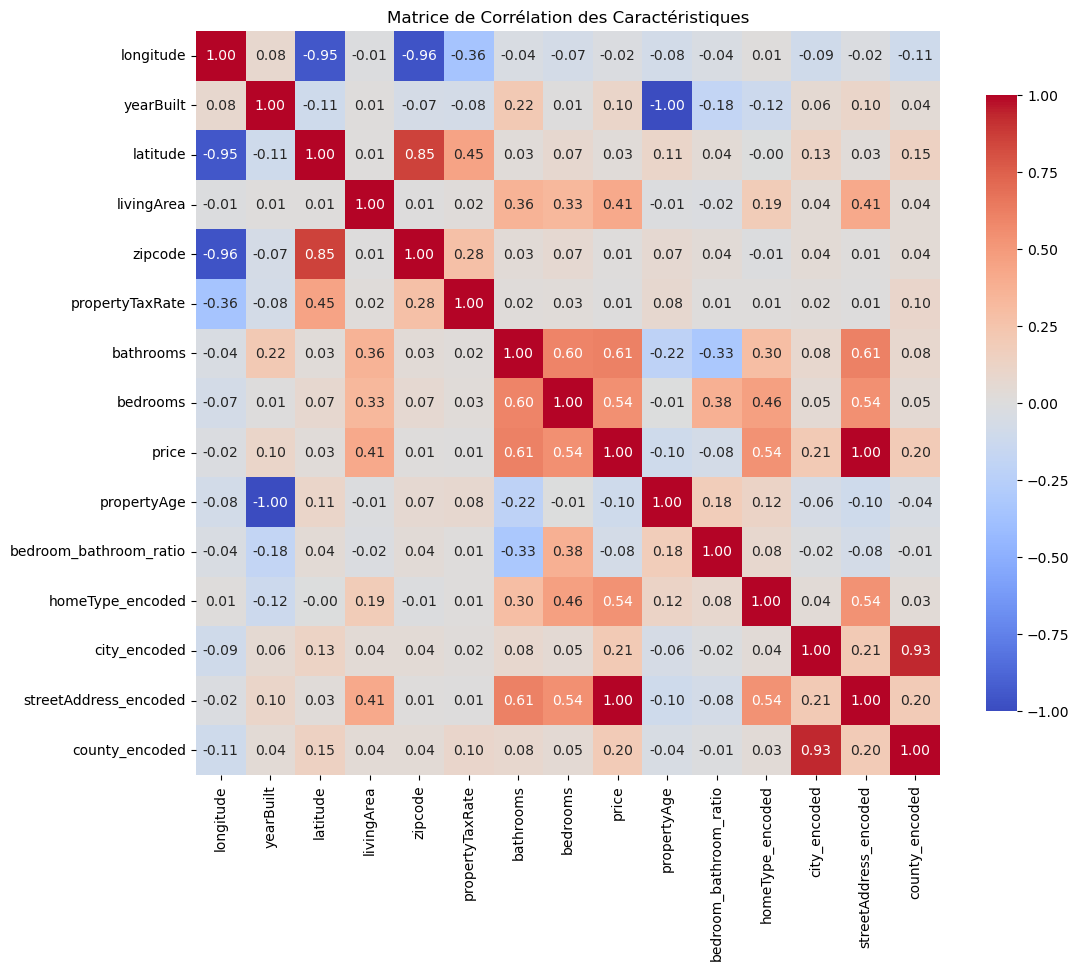

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt


data_clean = data_cleaned.select_dtypes(include=['float64', 'int64']).dropna()

# Calculer la matrice de corrélation
correlation_matrix = data_clean.corr()

# Configurer la taille de la figure
plt.figure(figsize=(12, 10))

# Créer la carte thermique
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Ajouter un titre
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()

In [157]:
# Suppression des colonnes qui ont une faibles corrélation avec le prix
col = ['longitude', 'latitude', 'zipcode', 'propertyTaxRate', 'bedroom_bathroom_ratio', 'propertyAge']
for elem in col:
    data_cleaned.drop(columns=[elem], inplace=True)

In [158]:
data_cleaned.columns

Index(['streetAddress', 'county', 'yearBuilt', 'city', 'livingArea',
       'bathrooms', 'bedrooms', 'price', 'homeType', 'homeType_encoded',
       'city_encoded', 'streetAddress_encoded', 'county_encoded'],
      dtype='object')

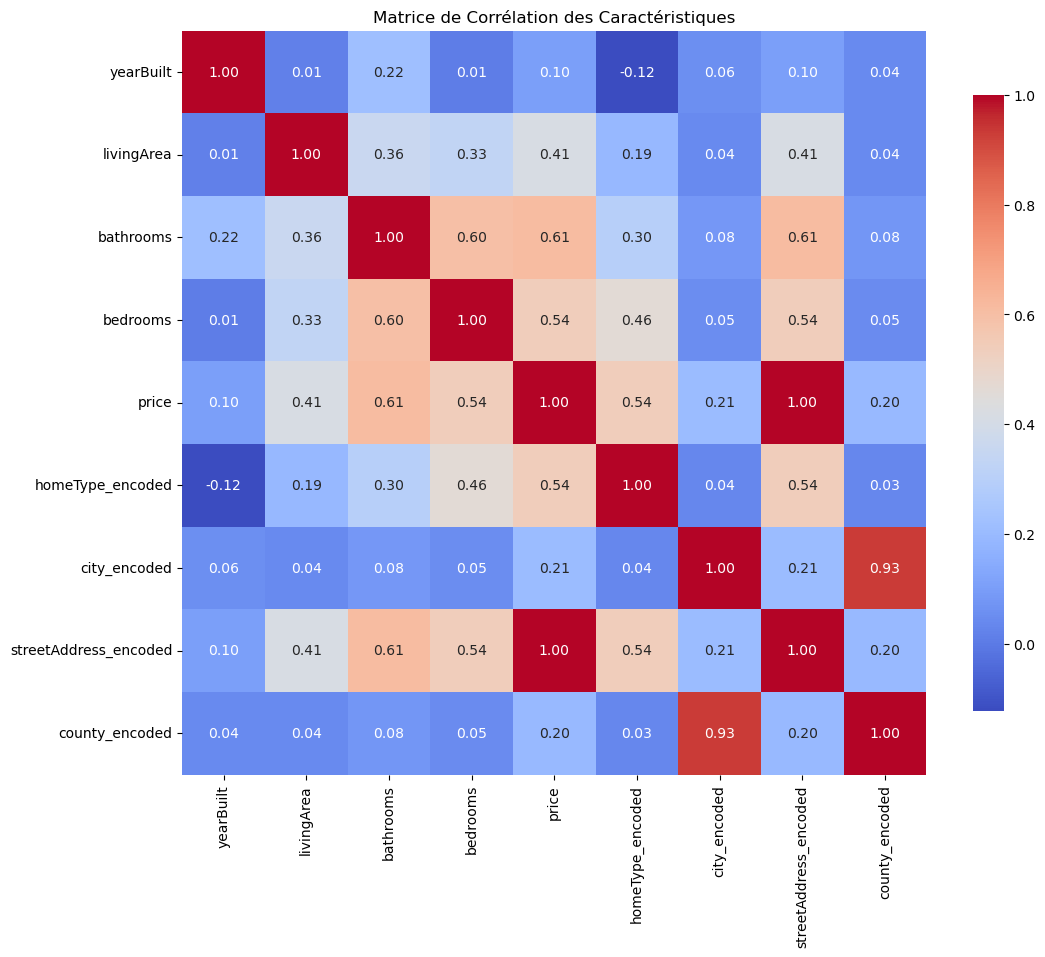

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt


data_clean = data_cleaned.select_dtypes(include=['float64', 'int64']).dropna()

# Calculer la matrice de corrélation
correlation_matrix = data_clean.corr()

# Configurer la taille de la figure
plt.figure(figsize=(12, 10))

# Créer la carte thermique
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Ajouter un titre
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()

In [160]:
data_cleaned

,streetAddress,county,yearBuilt,city,livingArea,bathrooms,bedrooms,price,homeType,homeType_encoded,city_encoded,streetAddress_encoded,county_encoded
0,500 North St,Anchorage Borough,1959.0,Anchorage,2668.0,2.0,3.0,676100,SINGLE_FAMILY,421835.690699,388538.588602,676100.0,388839.019293
1,520 N St,Anchorage Borough,1961.0,Anchorage,3179.0,2.0,3.0,698600,SINGLE_FAMILY,421835.690699,388538.588602,698600.0,388839.019293
3,530 North St,Anchorage Borough,1947.0,Anchorage,1642.0,2.0,5.0,695300,SINGLE_FAMILY,421835.690699,388538.588602,695300.0,388839.019293
5,527 North St,Anchorage Borough,2018.0,Anchorage,2560.0,3.5,3.0,603600,CONDO,214288.915946,388538.588602,603600.0,388839.019293
6,521 North St,Anchorage Borough,1961.0,Anchorage,3224.0,3.0,6.0,724400,MULTI_FAMILY,465926.107226,388538.588602,724400.0,388839.019293
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,11700 Shetland Heights Cir,Anchorage Borough,1978.0,Anchorage,4263.0,2.5,3.0,658100,SINGLE_FAMILY,421835.690699,388538.588602,658100.0,388839.019293
5153,5300 Whispering Spruce Dr,Anchorage Borough,1974.0,Anchorage,2200.0,2.0,4.0,514200,SINGLE_FAMILY,421835.690699,388538.588602,514200.0,388839.019293
5154,10630 E Tree Dr,Anchorage Borough,1972.0,Anchorage,4180.0,4.5,5.0,659000,SINGLE_FAMILY,421835.690699,388538.588602,659000.0,388839.019293
5155,6747 Double Tree Ct,Anchorage Borough,1972.0,Anchorage,3928.0,3.0,5.0,709400,SINGLE_FAMILY,421835.690699,388538.588602,709400.0,388839.019293


In [162]:
data_cleaned.columns

Index(['streetAddress', 'county', 'yearBuilt', 'city', 'livingArea',
       'bathrooms', 'bedrooms', 'price', 'homeType', 'homeType_encoded',
       'city_encoded', 'streetAddress_encoded', 'county_encoded'],
      dtype='object')

In [161]:
data_cleaned.to_excel('finalZillowDataSet.xlsx', index=False)

In [165]:
testData = data_cleaned[['streetAddress', 'city', 'county', 'homeType_encoded',
                          'city_encoded', 'streetAddress_encoded', 'county_encoded']]

In [166]:
testData

,streetAddress,city,county,homeType_encoded,city_encoded,streetAddress_encoded,county_encoded
0,500 North St,Anchorage,Anchorage Borough,421835.690699,388538.588602,676100.0,388839.019293
1,520 N St,Anchorage,Anchorage Borough,421835.690699,388538.588602,698600.0,388839.019293
3,530 North St,Anchorage,Anchorage Borough,421835.690699,388538.588602,695300.0,388839.019293
5,527 North St,Anchorage,Anchorage Borough,214288.915946,388538.588602,603600.0,388839.019293
6,521 North St,Anchorage,Anchorage Borough,465926.107226,388538.588602,724400.0,388839.019293
...,...,...,...,...,...,...,...
5152,11700 Shetland Heights Cir,Anchorage,Anchorage Borough,421835.690699,388538.588602,658100.0,388839.019293
5153,5300 Whispering Spruce Dr,Anchorage,Anchorage Borough,421835.690699,388538.588602,514200.0,388839.019293
5154,10630 E Tree Dr,Anchorage,Anchorage Borough,421835.690699,388538.588602,659000.0,388839.019293
5155,6747 Double Tree Ct,Anchorage,Anchorage Borough,421835.690699,388538.588602,709400.0,388839.019293


### Préparation des données pour l'entrainement du model

In [221]:
data_f = data_cleaned.copy()

In [222]:
data_f.drop(columns=['county', 'homeType', 'streetAddress', 'city'], inplace=True)

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Supposons que 'data' est votre DataFrame nettoyé
X = data_f.drop('price', axis=1)
y = data_f['price']

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')

MAE: 0.84795232076352
MSE: 1.4264711961928043
R^2: 0.9999999999376509


In [224]:
import joblib

# Enregistrer le modèle
joblib.dump(model, 'zillow_prediction_linearRegressor.pkl')

['zillow_prediction_linearRegressor.pkl']

In [225]:
test = {
    "yearBuilt": 2011.0,
    "livingArea": 2182.0,
    "bathrooms": 3.0,
    "bedrooms": 4.0,
    "homeType_encoded": 421235.690694,
    "city_encoded": 388538.588602,
    "streetAddress_encoded": 724400.0,
    "county_encoded": 388839.019293
}

In [219]:
model = joblib.load('zillow_prediction_linearRegressor.pkl')

In [226]:
testData = pd.DataFrame([test])

In [227]:
prediction = model.predict(testData)
print("Prédiction :", prediction)

Prédiction : [724397.45488867]


In [228]:
prediction = best_rf_model.predict(testData)
print("Prédiction :", prediction)

Prédiction : [725134.46188811]


In [229]:
#Évaluation des Performances :
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')

MAE: 0.84795232076352
MSE: 1.4264711961928043
R^2: 0.9999999999376509


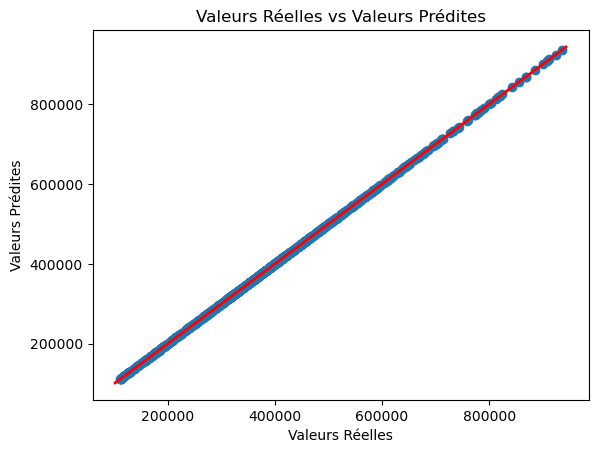

In [230]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Réelles vs Valeurs Prédites')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  # Ligne d'égalité
plt.show()

In [231]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'MAE (Cross-Validation): {-scores.mean()}')

MAE (Cross-Validation): 42.56234282562424
